<a href="https://colab.research.google.com/github/Gitzav/role_of_data_preparation/blob/main/Data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("rolling_sale_data.xlsx")

For sales prior to the Final Roll, Neighborhood Name and Descriptive Data reflect the most recent Final Roll. Sales after the Final Roll, Neighborhood Name and Descriptive Data reflect current data.

Building Class Category is based on Building Class at Time of Sale.

Note: Condominium and cooperative sales are on the unit level and understood to have a count of one.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79884 entries, 0 to 79883
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         79884 non-null  int64         
 1   NEIGHBORHOOD                    79884 non-null  object        
 2   BUILDING CLASS CATEGORY         79884 non-null  object        
 3   TAX CLASS AT PRESENT            79884 non-null  object        
 4   BLOCK                           79884 non-null  int64         
 5   LOT                             79884 non-null  int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       79884 non-null  object        
 8   ADDRESS                         79884 non-null  object        
 9   APARTMENT NUMBER                19539 non-null  object        
 10  ZIP CODE                        79863 non-null  float64       
 11  RE

In [4]:
df['SALE DATE'].dt.date.min()

datetime.date(2024, 11, 1)

In [5]:
df['SALE DATE'].dt.date.max()

datetime.date(2025, 10, 31)

In [14]:
df['LAND SQUARE FEET'].isnull().sum()

np.int64(36720)

In [25]:
year_built_non_condominium = df[(df['BUILDING CLASS AT PRESENT'].str.match(r'^R') == False) & (df['LAND SQUARE FEET'].isnull())]['YEAR BUILT']

In [31]:
df.sort_values(by='YEAR BUILT')

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4366,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,2,608,1713,NaN,R4,"118 WEST 13TH STREET, 04",04,...,1.0,NaN,1.0,NaN,NaN,190.0,2,R4,10250000,2025-07-30
34780,3,DOWNTOWN-METROTECH,13 CONDOS - ELEVATOR APARTMENTS,2,2058,1024,NaN,R4,"365 BRIDGE STREET, 3F",3F,...,1.0,NaN,1.0,NaN,NaN,1800.0,2,R4,1075000,2025-05-16
34789,3,DOWNTOWN-METROTECH,13 CONDOS - ELEVATOR APARTMENTS,2,2058,1178,NaN,R4,"101 WILLOUGHBY STREET, 12K",12K,...,1.0,NaN,1.0,NaN,NaN,1800.0,2,R4,0,2025-08-06
34781,3,DOWNTOWN-METROTECH,13 CONDOS - ELEVATOR APARTMENTS,2,2058,1032,NaN,R4,"365 BRIDGE STREET, 3N",3N,...,1.0,NaN,1.0,NaN,NaN,1800.0,2,R4,842500,2024-12-13
34779,3,DOWNTOWN-METROTECH,13 CONDOS - ELEVATOR APARTMENTS,2,2058,1005,NaN,R4,"365 BRIDGE STREET, 2D",2D,...,1.0,NaN,1.0,NaN,NaN,1800.0,2,R4,0,2024-12-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79464,5,WESTERLEIGH,01 ONE FAMILY DWELLINGS,1B,482,5,NaN,V0,2435 VICTORY BOULEVARD,NaN,...,0.0,0.0,0.0,2291.0,0.0,NaN,1,A1,730000,2024-11-06
79585,5,WESTERLEIGH,05 TAX CLASS 1 VACANT LAND,1B,389,57,NaN,V0,N/A VELTMAN AVENUE,NaN,...,0.0,0.0,0.0,2644.0,0.0,NaN,1,V0,0,2025-06-03
79586,5,WESTERLEIGH,05 TAX CLASS 1 VACANT LAND,1B,458,84,NaN,V0,N/A MARBLE STREET,NaN,...,0.0,0.0,0.0,1701.0,0.0,NaN,1,V0,500,2025-04-09
79880,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6926,78,NaN,V0,N/A SHELDON AVENUE,NaN,...,0.0,0.0,0.0,2000.0,0.0,NaN,1,V0,170000,2024-12-16


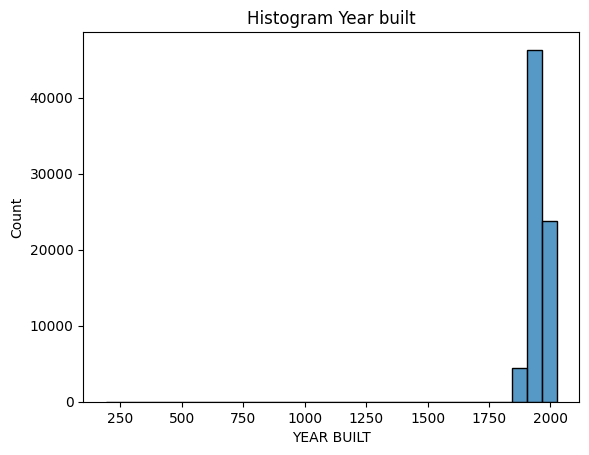

In [28]:
sns.histplot(df['YEAR BUILT'], bins=30, kde=False)
plt.title("Histogram Year built")
plt.show()

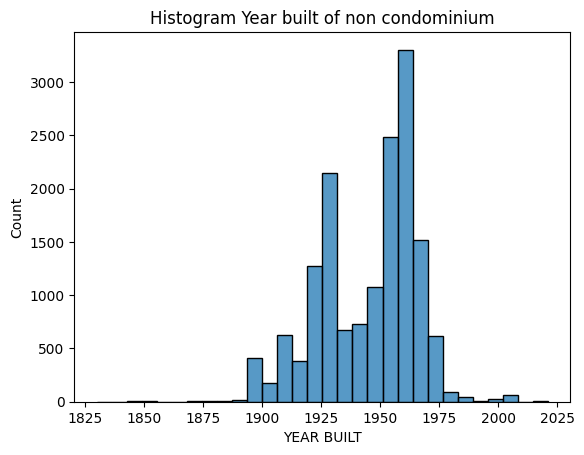

In [26]:
sns.histplot(year_built_non_condominium, bins=30, kde=False)
plt.title("Histogram Year built of non condominium")
plt.show()